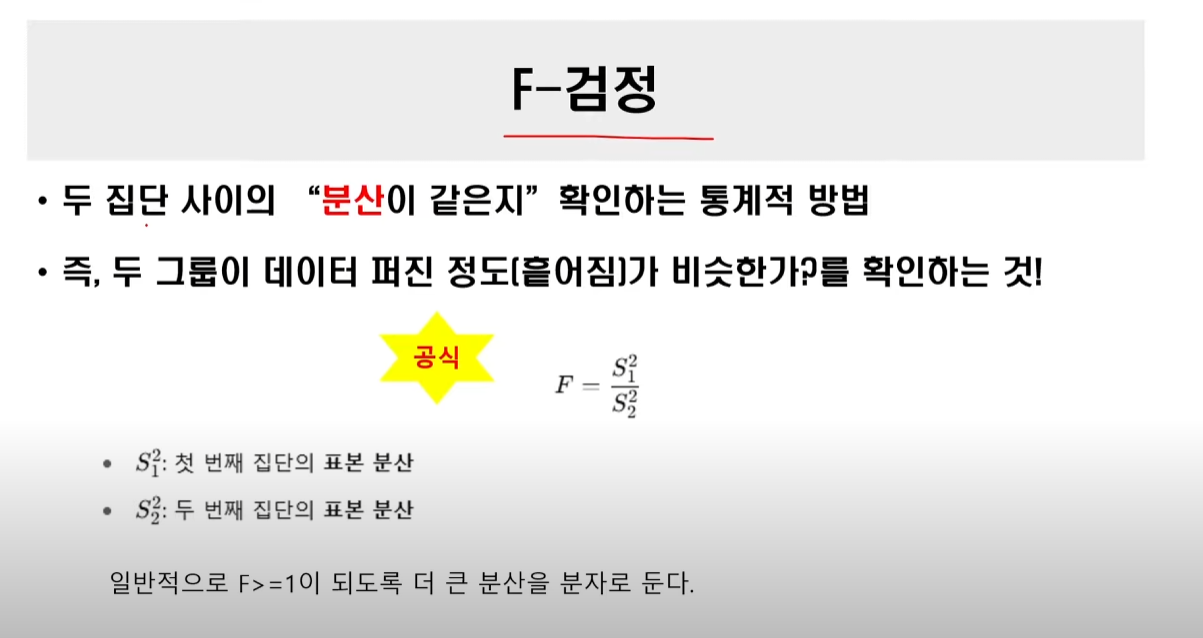

**t검정 = 평균**


**F검정 = 분산 **

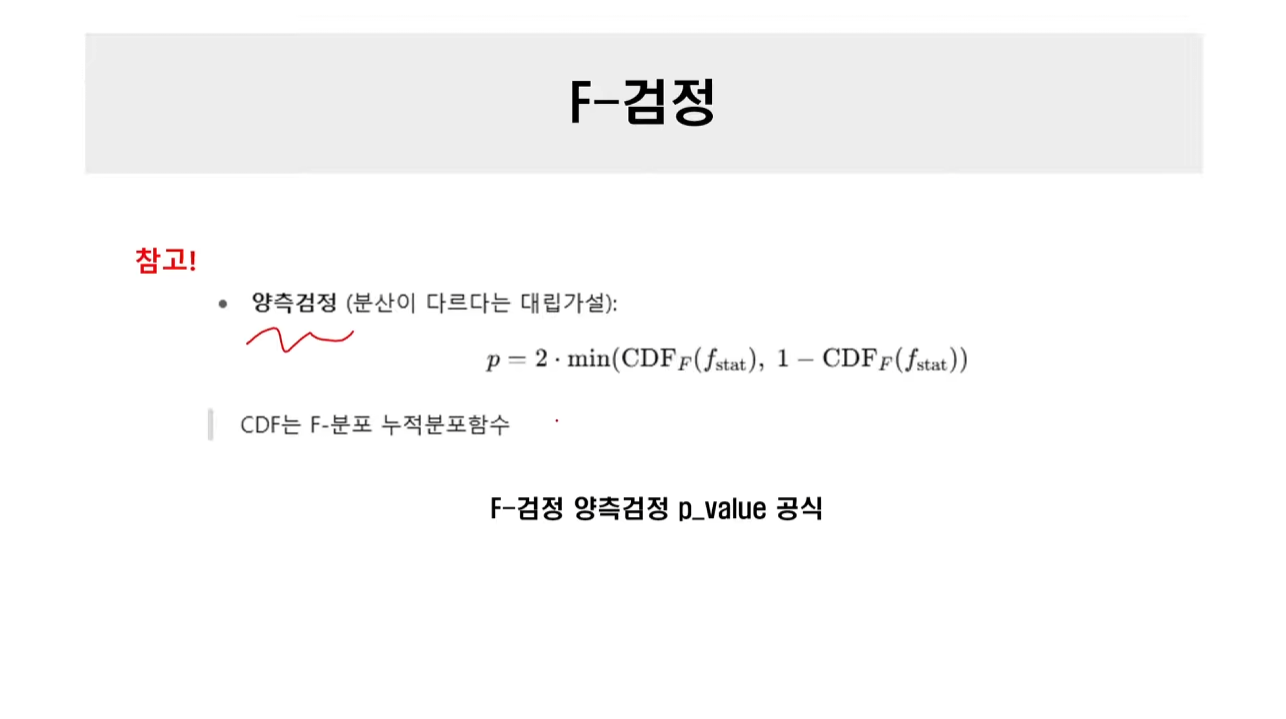

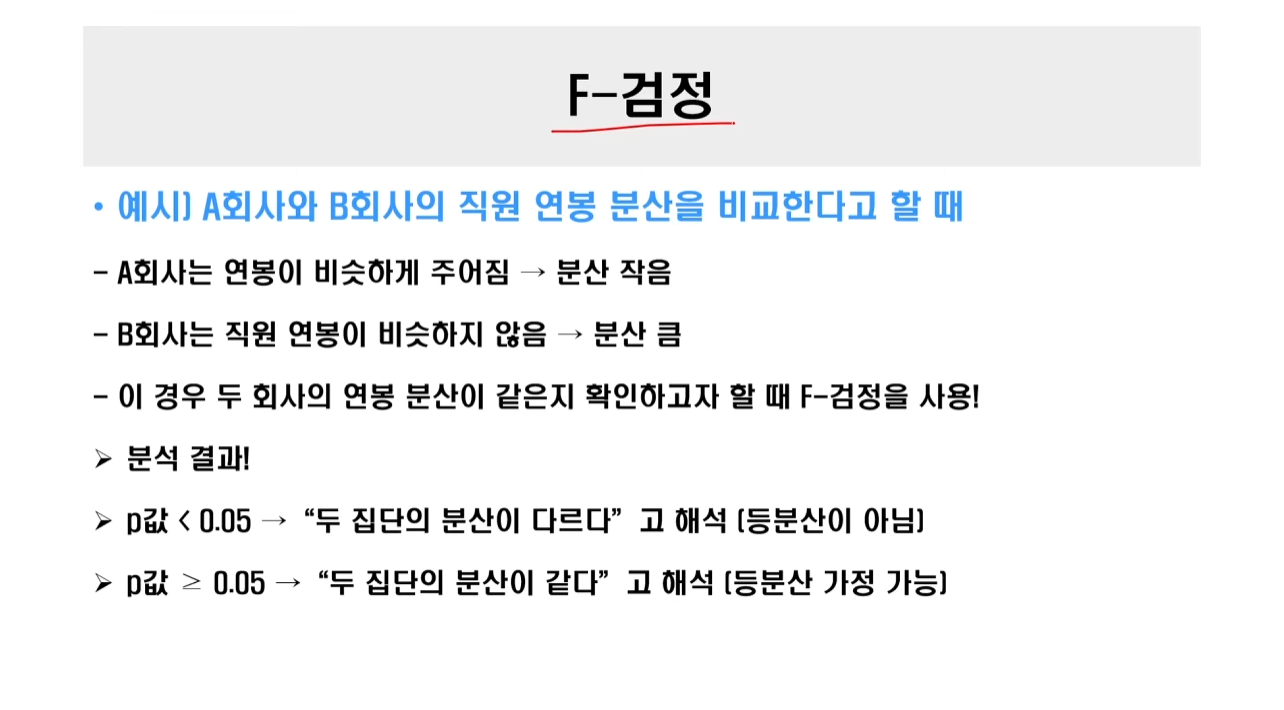

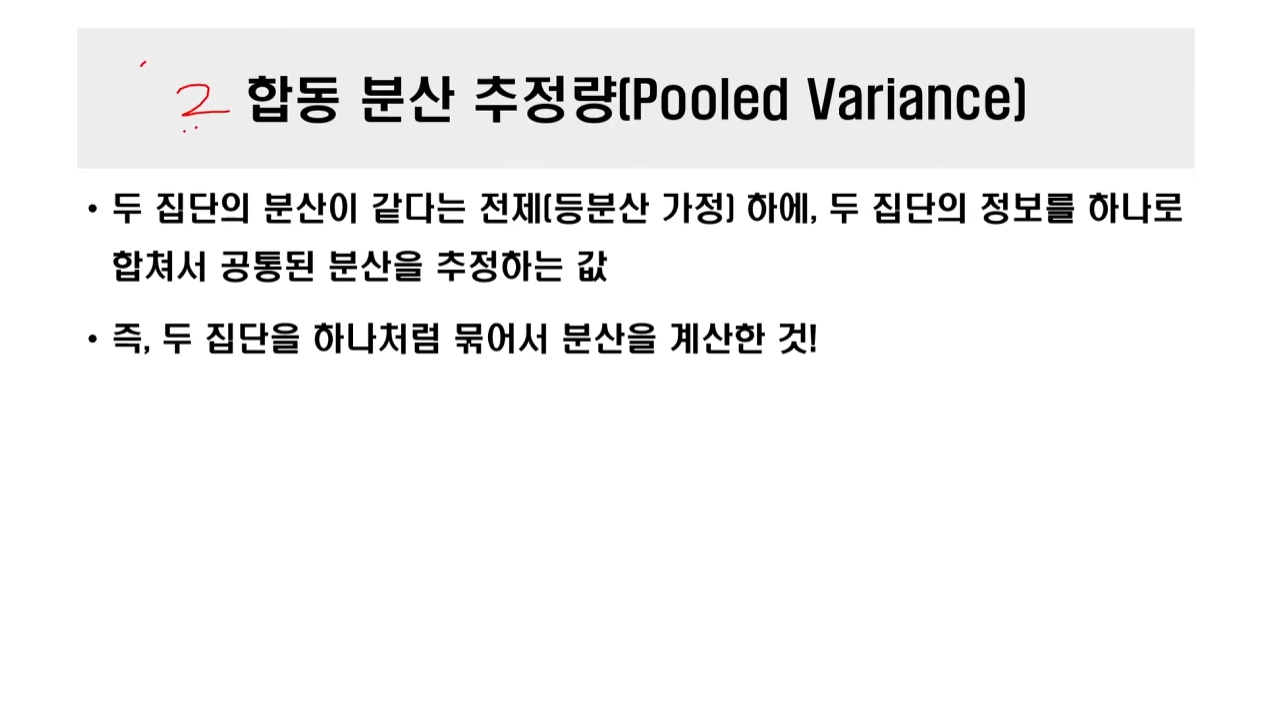

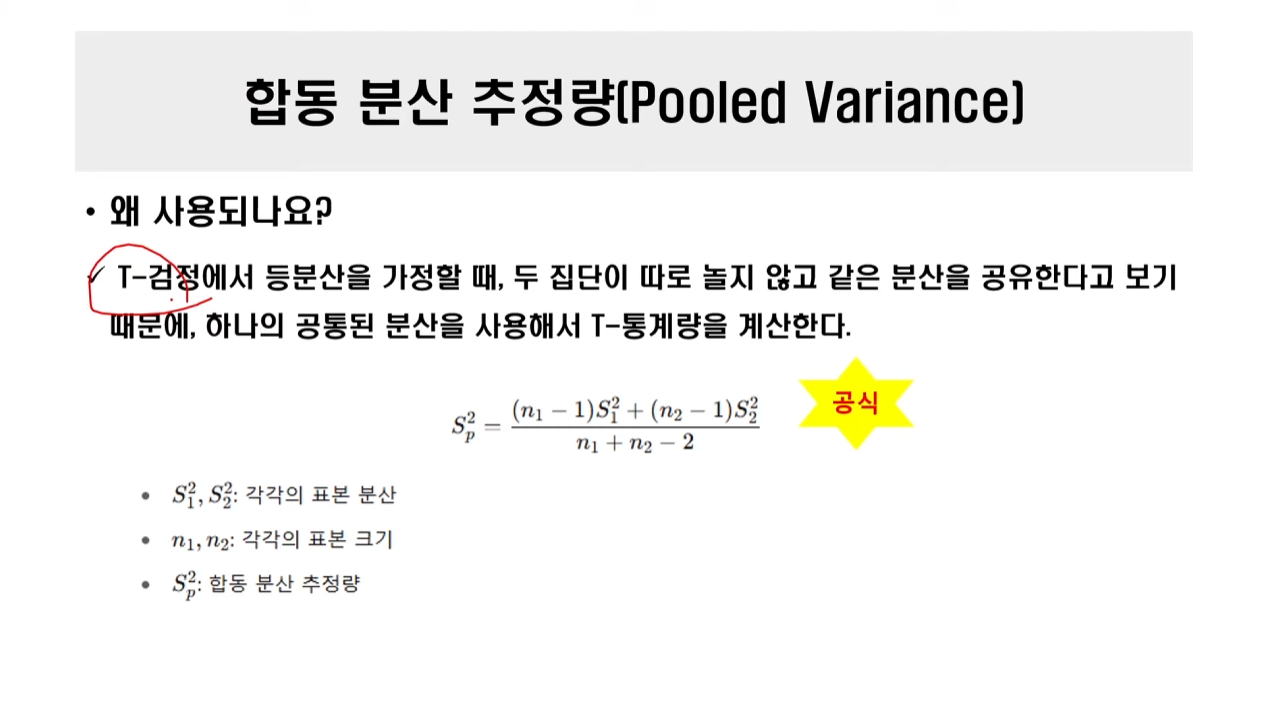

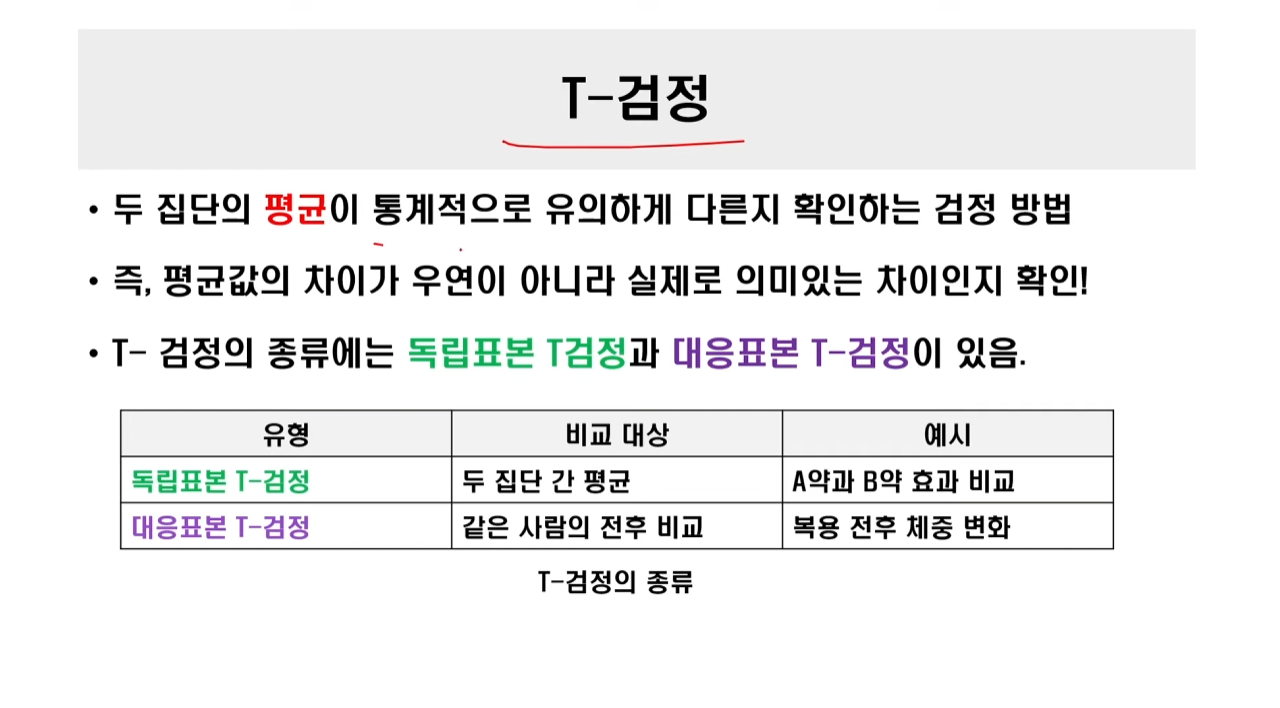

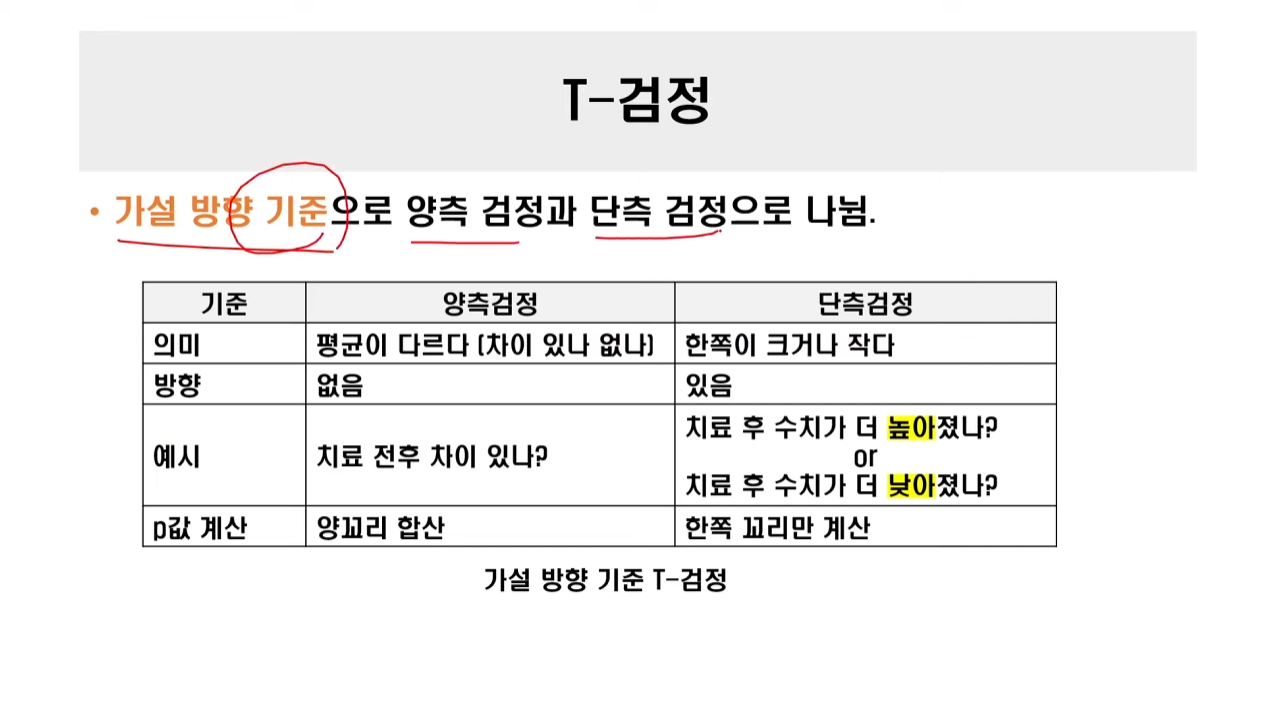

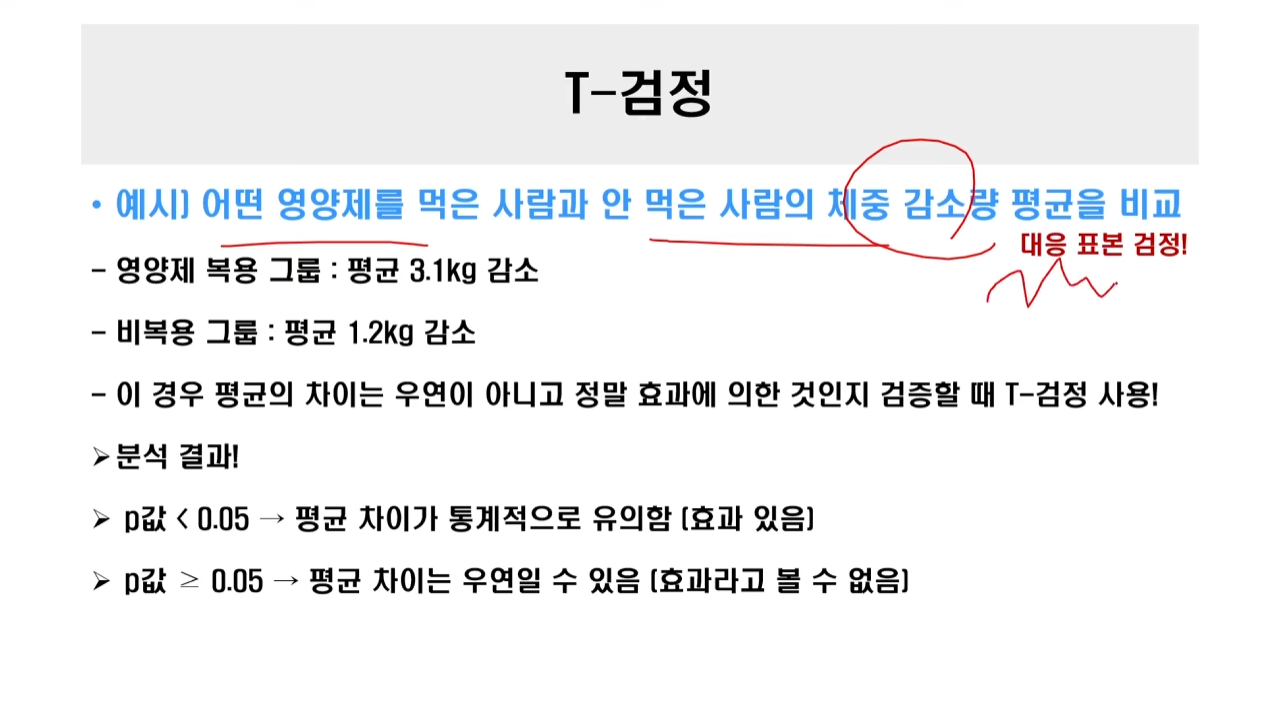

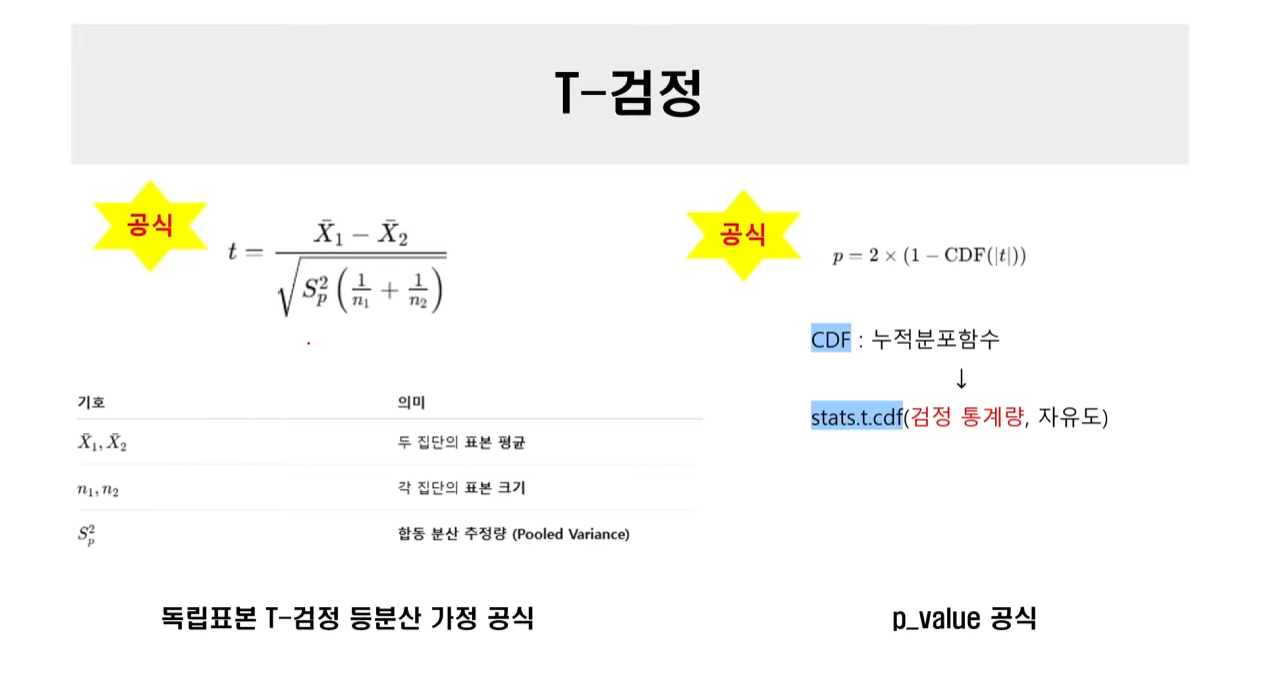

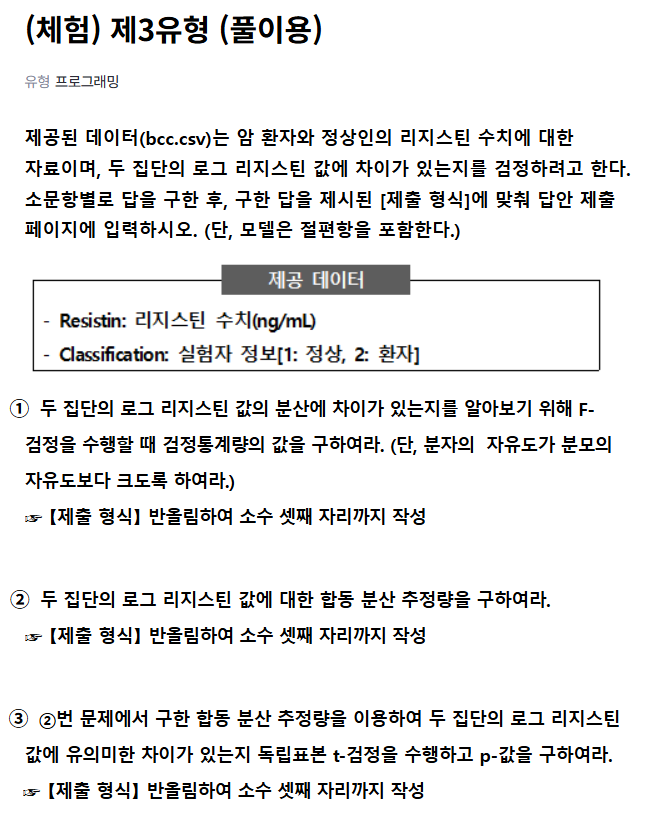

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("data/bcc.csv")

# 로짓 변환
df['log_resistin'] = np.log(df['Resistin'])

# 그룹 나누기
group1 = df[df['Classification']==1]['log_resistin']
group2 = df[df['Classification']==2]['log_resistin']

# 분산 연산
# 모집단은 자유도ddof=0 / 표본집단 = 1
var1 = np.var(group1, ddof=1)
var2 = np.var(group2, ddof=1)

# f-통계량
if var1 >= var2:
	f_stat = var1/var2
else:
	f_stat = var2/var1

print(round(f_stat, 3))

# 2번문제
# 표본 크기 연산
n1 = len(group1)
n2 = len(group2)

#print(n1)
#print(n2)

# 합동 분산 추정량 연산
pool_var = ((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2)
print(round(pool_var, 3))

# 3번 문제
# 표본 평균 연산
mean1 = np.mean(group1)
mean2 = np.mean(group2)

# 자유도 연산
total_df = n1 + n2 - 2
t_stat = (mean1 - mean2) / np.sqrt(pool_var*(1/n1 + 1/n2))
print(round(t_stat, 3))

# p-value 연산
p_val = 2*(1 - stats.t.cdf(abs(t_stat), total_df))
print(round(p_val, 3))

# p값 0.05보다 작은 0.03 ->"통계적으로 유의미" = "차이가 있다"

한 제조회사에서 생산성을 높이고자 직원들의 주요 생산성 요인을 분석하기로 결정하였다. 이를 위해 200명의 직원 데이터를 수집했으며, 직원들의 근무 기간, 특성 정보, 그리고 개인적인 속성을 조사하였다.


1. 모든 칼럼을 활용하여 design(생산성 점수)을 예측하는 다중회귀 분석을 시행한 후 유의하지 않은 설명변수 개수를 구하시오.(패널티는 포함되지 않으며, 모델의 절편항은 포함)
- 데이터 분리 조건
- 훈련 데이터: id1~id140
- 테스트 데이터: id141~id200


2. 훈련 데이터(학습용 데이터)의 예측값과 실제값의 피어슨 상관계수를 구하시오.

3. 적합한 모델을 활용하여 테스트데이터에서의 RMSE 값을 구하시오.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stat_exam_custom.csv to stat_exam_custom.csv


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr
df = pd.read_csv('9_3_1.csv')

train_df = df[df['id'] <= 140]
test_df = df[df['id']>140]

#print(train_df.head())
#print(test_df.head())

X_train = train_df.drop(columns=['id', 'design'])
y_train = train_df['design']
X_test = test_df.drop(columns=['id', 'design'])
y_test = test_df['design']

from sklearn.linear_model import LinearRegression
# 절편항이 포함된 선형 회귀 모형을 적합하기 위해 추가, 절편항 제외시 과정 생략
# 절편항 추가
# 선형 회귀 model = sm.OLS(y, X_const).fit()
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
#print(model.summary())

no_vars = model.pvalues[1:] > 0.05
no_vars_nums = no_vars.sum()
print("유의하지 않은 설명변수 개수: ", no_vars_nums)

pvalue_all = model.pvalues[:]
print(pvalue_all)

# 훈련 데이터의 피어슨 상관계수 (예측값 vs 실제값)
y_train_pred = model.predict(X_train_const)
pearson_corr, _ = pearsonr(y_train, y_train_pred)
print("훈련 데이터 피어슨 상관계수: ", round(pearson_corr, 3))

from sklearn.metrics import mean_squared_error
lr_model = LinearRegression().fit(X_train, y_train)
y_test_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("테스트 데이터 RMSE: ", round(rmse, 3))

# 카이제곱 검정
from scipy.stats import chi2_contingency
table = pd.crosstab(df['id'], df['design'])

statistics, p, df, expected = chi2_contingency(table)
print("카이제곱 통계량: ", round(statistics, 3))
print("p-value: ", round(p, 3))

from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, chisquare
# ✅ 카이제곱 통계량 사용 조건
# 두 개의 범주형 변수
# 교차표 생성 가능

유의하지 않은 설명변수 개수:  2
const     3.274672e-01
tenure    1.158686e-10
f2        4.177698e-06
f3        5.794309e-01
f4        3.275456e-52
f5        8.438785e-01
dtype: float64
훈련 데이터 피어슨 상관계수:  0.915
테스트 데이터 RMSE:  4.396
카이제곱 통계량:  39800.0
p-value:  0.239


한 통신 회사에서는 고객 이탈을 줄이고자 주요 요인들을 분석하기로 결정하였다. 이를 위해 500명의 고객 데이터를 수집했으며 고객의 서비스 이용 및 가입정보, 그리고 일부 개인적인 속성을 조사하였다.

1. 고객 이탈을 예측하는 로지스틱 회귀를 시행한 후 col1칼럼의 p-value를 구하시오.

2. 폰 서비스를 받지 않은 고객 대비 받은 고객의 이탈 확률 오즈비를 구하시오.

3. 이탈할 확률이 0.3이상인 고객 수를 구하시오.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('9_3_2.csv')
#print(df.head())

X = df[['col1', 'col2', 'Phone_Service', 'Tech_Insurance']]
X_const = sm.add_constant(X)
y = df['churn']

import statsmodels.api as sm
logit_model = sm.Logit(y, X_const).fit(disp=False)
print(logit_model.summary())

col1_pvalue = logit_model.pvalues['col1']
print(f"col1의 p-value: {col1_pvalue:.8f}")

# churn은 이탈 여부 (0 또는 1)이므로, 평균 = 이탈률
churn_rate_phone0 = df[df['Phone_Service']==0]['churn'].mean()
churn_rate_phone1 = df[df['Phone_Service']==1]['churn'].mean()

odds_phone0 = churn_rate_phone0 / (1 - churn_rate_phone0)
odds_phone1 = churn_rate_phone1 / (1 - churn_rate_phone1)

odds_ratio = odds_phone1 / odds_phone0
print("오즈비: ", round(odds_ratio, 3))

predicted_probs = logit_model.predict(X_const)
over_30 = (predicted_probs >= 0.3).sum()
print("고객 수: ", over_30)


# col1이 한 단위  증가할 때 오즈비 값은?
print(round(np.exp(0.0545), 3))

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                  500
Model:                          Logit   Df Residuals:                      495
Method:                           MLE   Df Model:                            4
Date:                Thu, 19 Jun 2025   Pseudo R-squ.:                 0.07562
Time:                        09:23:25   Log-Likelihood:                -320.36
converged:                       True   LL-Null:                       -346.57
Covariance Type:            nonrobust   LLR p-value:                 1.128e-10
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5390      0.824     -1.868      0.062      -3.154       0.076
col1               0.0545      0.010      5.292      0.000       0.034       0.075
col2              -0.0430      0.020

한 건강센터에서는 비만 여부에 따라 인슐린 수치에 차이가 있는지를 분석하고자 하였다.
이를 위해 총 100명의 데이터를 수집하였고,
이들을 **비만 그룹(Obesity=1)**과 **비비만 그룹(Obesity=2)**으로 나누어
분석을 진행하였다.


1. 로그 변환된 인슐린 수치를 기준으로
**비만 그룹과 비비만 그룹 간 분산 비(F-통계량)**을 구하시오.

2. 두 그룹의 **합동분산(pooled variance)**을 구하시오.

3. 두 그룹 간 독립표본 t-검정 통계량을 구하시오.
(등분산 가정하에 수행)

4. 위 t-검정의 p-value를 소수점 셋째 자리에서 반올림하여 제시하시오.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('obesity_insulin.csv')
#print(df.head())

df['log_Insulin'] = np.log(df['Insulin'])

group1 = df[df['Obesity']==1]['log_Insulin']
group2 = df[df['Obesity']==2]['log_Insulin']

var1 = np.var(group1, ddof=1)
var2 = np.var(group2, ddof=1)

if var1 >= var2:
  f_stat = var1/var2
else:
  f_stat = var2/var1

print(round(f_stat, 3))

n1 = len(group1)
n2 = len(group2)

pool_var = ((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2)
print(round(pool_var, 3))

mean1 = np.mean(group1)
mean2 = np.mean(group2)
total_df = n1 + n2 - 2

t_stat = (mean1 - mean2) / np.sqrt(pool_var * ((1/n1) + (1/n2)))
print(round(t_stat, 3))

p_val = 2*(1 - stats.t.cdf(abs(t_stat), total_df))
print(round(p_val, 3))

1.082
0.039
4.344
0.0


| 종류       | 가설 구조                                                       | p-value 계산 방식            |
| -------- | ----------------------------------------------------------- | ------------------------ |
| **양측검정** | H₀: μ₁ = μ₂<br>H₁: μ₁ ≠ μ₂                                  | `2 * (1 - stats.t.cdf(abs(t)))`  |
| **단측검정** | H₀: μ₁ ≤ μ₂<br>H₁: μ₁ > μ₂  또는 <br>H₀: μ₁ ≥ μ₂, H₁: μ₁ < μ₂ | `1 - stats.t.cdf(t)` 또는 `CDF(t)` |


✅ 2. 단측검정 p-value 계산 공식


👉 평균 차이가 크다(μ₁ > μ₂) 를 검정하는 경우:


p_val = 1 - stats.t.cdf(t_stat, df)


👉 평균 차이가 작다(μ₁ < μ₂) 를 검정하는 경우:


p_val = stats.t.cdf(t_stat, df)


In [ ]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, chisquare

# 독립표본 양측검정: 평균이 다른지 검정
t_stat, p_val = stats.ttest_ind[group1, group2]

# 독립표본 단측검정 [group1 < group2]: 서로 다른 두 집단 중 하나가 더 큰지/작은지 검정
t_stat, p_val = stats.ttest_ind[group1, group2, alternative='less']
# 독립표본 단측검정 [group1 > group2]
t_stat, p_val = stats.ttest_ind[group1, group2, alternative='greater']

# 대응표본 양측검정: 같은 집단의 두 조건 간 평균이 다른지 검정
t_stat, p_val = stats.ttest_rel[after, before]

# 대응표본 단측검정: 같은 집단의 두 조건 중 하나가 더 큰지/작은지 검정
t_stat, p_val = stats.ttest_rel[after, before, alternative='less']
t_stat, p_val = stats.ttest_rel[after, before, alternative='greater']

# 양측 = 평균 검정
# 단측 = 어디가 더 큰지/작은지, alternative 꼭 필요

In [ ]:
# ✅ 통계 함수 정리 요약 테이블 (빅데이터분석기사 실기 대비)

# 📦 주요 라이브러리 import 정리
from scipy import stats  # t검정, 카이제곱, 정규성, 분포 관련
from statsmodels.formula.api import ols, logit, glm  # 회귀 분석
from statsmodels.stats.anova import anova_lm  # 분산분석
from statsmodels.stats.proportion import proportions_ztest  # 비율 검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # 사후검정
import pandas as pd
import numpy as np

# 📊 주요 검정 함수 정리
# 1. 정규성 검정
stats.shapiro(data)  # 정규분포 여부 확인

# 2. t-검정
stats.ttest_1samp(sample, popmean)  # 단일표본 t검정
stats.ttest_ind(group1, group2, equal_var=True)  # 독립표본 t검정
stats.ttest_rel(before, after)  # 대응표본 t검정

# 3. 분산분석 (ANOVA)
stats.f_oneway(group1, group2, group3)  # 일원분산분석
anova_lm(ols('y ~ C(group)', data=df).fit())  # 일원분산분석 (formula)
anova_lm(ols('y ~ C(a) + C(b) + C(a):C(b)', data=df).fit())  # 이원분산분석

# 4. 카이제곱 검정
stats.chi2_contingency(pd.crosstab(df['A'], df['B']))  # 독립성 검정
stats.chisquare(f_obs=observed, f_exp=expected)  # 적합도 검정

# 5. 비율 검정
proportions_ztest(count=[30, 40], nobs=[100, 100])

# 6. 회귀 분석
ols('y ~ x1 + x2', data=df).fit()  # 선형회귀
logit('target ~ x1 + x2', data=df).fit()  # 로지스틱 회귀 (이항)
glm('target ~ x1 + x2', data=df, family=sm.families.Binomial()).fit()

# 7. 사후 검정
pairwise_tukeyhsd(df['score'], df['group'])

# 8. 분포 분석 (이항, 포아송 등)
from scipy.stats import binom, poisson
binom.pmf(k, n, p)  # 이항분포
poisson.pmf(k, mu)  # 포아송분포


# ✅ 실전 예제 코드 - 분산분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('score ~ C(method)', data=df).fit()
result = anova_lm(model)
print(result)

# ✅ 실전 예제 코드 - 독립표본 t검정
from scipy import stats
stats.ttest_ind(df[df['group']=='A']['score'],
                df[df['group']=='B']['score'])

# ✅ 실전 예제 코드 - 로지스틱 회귀
from statsmodels.formula.api import logit
model = logit('target ~ age + income', data=df).fit()
print(model.summary())

# ✅ 실전 예제 코드 - 카이제곱 독립성 검정
from scipy.stats import chi2_contingency
ct = pd.crosstab(df['성별'], df['만족도'])
chi2, p, _, _ = chi2_contingency(ct)
print(p)


# ✅ 가설검정 순서 흐름도
# 1. 데이터 정규성 검정 (Shapiro-Wilk)
#   - 정규분포 → t검정/ANOVA 가능
#   - 비정규분포 → 비모수검정 고려 (Mann-Whitney 등)

# 2. 집단 간 수 비교
#   (1) 두 집단
#       - 독립: ttest_ind() 또는 Mann-Whitney
#       - 대응: ttest_rel() 또는 Wilcoxon
#   (2) 세 집단 이상
#       - 정규분포 → f_oneway() + 사후검정 (Tukey)
#       - 비정규 → Kruskal-Wallis

# 3. 범주형 변수 비교
#   - 독립성 검정: chi2_contingency()
#   - 적합도 검정: chisquare()

# 4. 예측모델 분석
#   - 종속변수 수치형 → ols()
#   - 종속변수 범주형 → logit(), glm(... Binomial)

# 필수: p값 해석, 유의수준 0.05 기준으로 귀무가설 기각 여부 결정


In [ ]:
# 어느 회사에서 직원들의 생산성에 영향을 미치는 요인이 무엇인지 확인하고자 한다. 100명의 직원들을 대상으로 생산성 점수, 근무 시간, 연령, 그리고 경력을 조사하였다.
# 1. 훈련 데이터를 기준으로 생산성 점수(productivity)를 종속변수로 하고 근무 시간, 연령, 그리고 경력을 독립변수로 하는 다중회귀 분석을 수행한 후, 회귀계수가 가장 높은 변수를 구하시오(절편 포함)
# 2. 유의수준 5%하에서 각 독립변수가 생산성에 미치는 영향이 유의미한지 판단하고, 유의미한 변수 개수를 구하시오.(p-value는 소수점 넷째 자리까지 반올림)
# 3. 테스트 데이터로 모델의 성능을 평가하시오
import pandas as pd
train = pd.read_csv('8_3_2_train.csv')
test = pd.read_csv('8_3_2_test.csv')

#print(train.head())
#print(test.head())

X = train.drop(['productivity'], axis=1)
y = train['productivity']
X_submit = test.drop(['productivity'], axis=1)

import statsmodels.api as sm
X_const = sm.add_constant(X)

from statsmodels.formula.api import ols
model = ols('productivity ~ hours + age + experience', data=train).fit()
print(model.summary())
# 답: hours

no_vars = model.pvalues[1:] <= 0.05
print(no_vars)
# 3개

X_test = test.drop(['productivity'], axis=1)
y_test = test['productivity']
X_test_const = sm.add_constant(X_test)

y_pred = model.predict(X_test_const)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(round(r2, 4))

                            OLS Regression Results                            
Dep. Variable:           productivity   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     69.03
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           1.20e-21
Time:                        15:47:47   Log-Likelihood:                -297.10
No. Observations:                  80   AIC:                             602.2
Df Residuals:                      76   BIC:                             611.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.2310     11.097      6.059      0.0

In [ ]:
# 훈련 데이터로 학습한 모델을 테스트 데이터에 적용하여 예측한 결과를 제출하시오
# Target = count
# ID, pred 칼럼만 존재해야 한다. (평가지표: MAE)

import pandas as pd
train = pd.read_csv('8_2_train.csv')
test = pd.read_csv('8_2_test.csv')

#print(train.info())
#print(test.info())

X = train.drop(['count'], axis=1)
y = train['count']
X_submit = test.drop(['ID', 'count'], axis=1)

X = pd.get_dummies(X, columns = ['holiday', 'workingday', 'weather'])
X_submit = pd.get_dummies(X_submit, columns = ['holiday', 'workingday', 'weather'])
X_submit = X_submit.reindex(columns = X.columns, fill_value = 0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
val_pred = model.predict(X_test)
#print(val_pred)

from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
mae = mean_absolute_error(y_test, val_pred)
rmse = root_mean_squared_error(y_test, val_pred)
r2 = r2_score(y_test, val_pred)
print(round(mae, 3))
print(round(rmse, 3))
print(round(r2, 3))

model.fit(X, y)
final_pred = model.predict(X_submit)
#print(final_pred)

result = pd.DataFrame({
    'ID' : test['ID'],
    'pred' : final_pred
})

result.to_csv('result.csv', index=False)
print(pd.read_csv('result.csv').head())


108.829
139.627
0.328
      ID    pred
0   4775   32.94
1  10539   84.41
2   8229  204.19
3   8677  314.80
4   5071   41.76


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('stat_exam_data.csv')

print(df.head())
#help(stats)

ct = pd.crosstab(df['ServiceGroup'], df['Purchase'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(ct)
#print("카이제곱 통계량:", round(chi2_stat, 3))
#print("p-value:", round(p_val, 3))
#print("자유도:", dof)
#print("\n기대빈도표:")
#print(expected)

group1 = df[df['GroupNum']==1]['Score']
group2 = df[df['GroupNum']==2]['Score']

# 가정: 이분산 (equal_var=False)
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
#print("t-통계량:", round(t_stat, 3))
#print("p-value:", round(p_val, 3))

# 3번. 로지스틱 회귀분석
# 고객의 이탈 여부(Churn)를 예측하는 로지스틱 회귀를 수행하시오.
# UsageTime의 p-value를 소수점 넷째 자리까지 제시하시오.
# PlanType이 1인 고객이 0인 고객보다 이탈할 오즈비를 구하시오.
# 이탈 확률이 0.3 이상인 고객 수를 구하시오.

import statsmodels.api as sm
from statsmodel.formula.api import logit
X = df[['UsageTime', 'PlanType', 'Support']]
X_const = sm.add_constant(X)
y = df['Churn']

logit_model = sm.Logit(y, X_const).fit(disp=False)

usage_time_pval = logit_model.pvalues['UsageTime']
print("1. UsageTime의 p-value:", round(usage_time_pval, 4))

plan_odds_ratio = np.exp(logit_model.params['PlanType'])
print("2. PlanType의 오즈비:", round(plan_odds_ratio, 3))

pred_probs = logit_model.predict(X_const)
num_high_prob = (pred_probs >= 0.3).sum()
print("3. 이탈 확률 ≥ 0.3인 고객 수:", num_high_prob)

  ServiceGroup  Purchase  GroupNum      Score   UsageTime  PlanType  Support  \
0            A         0         1  76.937732  141.042103         0        0   
1            B         0         1  68.404266  265.071404         0        1   
2            B         0         2  63.395581  244.763014         0        0   
3            A         0         2  77.932926  268.748203         0        0   
4            B         0         2  51.478090  133.389417         0        0   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  
1. UsageTime의 p-value: 0.019
2. PlanType의 오즈비: 1.901
3. 이탈 확률 ≥ 0.3인 고객 수: 51


In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.read_csv("stat_exam_custom.csv")
#print(df.head())

model = ols('score ~C(method)', data=df).fit()
anova_result = anova_lm(model)

print(anova_result)
f_stat = anova_result['F'][0]
p_val = anova_result['PR(>F)'][0]

print("F-통계량:", round(f_stat, 3))
print("p-value:", round(p_val, 4))

              df        sum_sq     mean_sq         F    PR(>F)
C(method)    2.0   1854.479277  927.239639  7.407125  0.000861
Residual   147.0  18401.773361  125.182132       NaN       NaN
F-통계량: 7.407
p-value: 0.0009


/tmp/ipython-input-46-611331408.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_stat = anova_result['F'][0]
/tmp/ipython-input-46-611331408.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_result['PR(>F)'][0]


In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# 데이터 불러오기
df = pd.read_csv("9_3_2.csv")  # 통신 회사 이탈 예제

# 그룹별 이탈자 수 계산
churn_0 = df[df['Phone_Service'] == 0]['churn'].sum()
n_0 = df[df['Phone_Service'] == 0].shape[0]

churn_1 = df[df['Phone_Service'] == 1]['churn'].sum()
n_1 = df[df['Phone_Service'] == 1].shape[0]

# z-검정 수행
count = [churn_0, churn_1]   # 이탈한 고객 수
nobs = [n_0, n_1]            # 전체 고객 수
z_stat, p_val = proportions_ztest(count, nobs)

print("z-통계량:", round(z_stat, 3))
print("p-value:", round(p_val, 4))